In [1]:
import pandas as pd

from pathlib import Path
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
in_d = Path('input')

In [3]:
preds_df = pd.read_csv('submission.csv')

In [4]:
targs_df = pd.read_csv(in_d / 'validation_y_0.025.csv')

In [5]:
df = pd.merge(preds_df, targs_df, on='row_id')

In [6]:
assert len(df) == len(preds_df) == len(targs_df)

In [7]:
df

,row_id,answered_correctly_x,answered_correctly_y,group_num
0,98894519,0.822936,1,0
1,100441978,0.822936,1,0
2,100728469,0.541432,0,0
3,100728470,0.313070,0,0
4,100728471,0.473335,1,0
...,...,...,...,...
2435783,100456109,0.995903,1,9999
2435784,100456110,0.997503,1,9999
2435785,100456111,0.761138,1,9999
2435786,100797490,0.999297,1,9999


In [8]:
fpr, tpr, _ = roc_curve(df.answered_correctly_y, df.answered_correctly_x)

In [9]:
roc_auc = roc_auc_score(df.answered_correctly_y, df.answered_correctly_x)

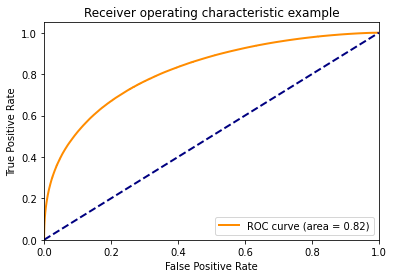

In [10]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
accu = accuracy_score(df.answered_correctly_y, df.answered_correctly_x >= 0.5)
accu

0.7558592948154765